In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import PFSMG as pfsmg
import functions as func
import generate_synthetic_data as gen

In [2]:
# differnt random seed to generate 
SEED = 6600451
# param will control correlation between two groups, in the experiment, I use range from 1.2 to 8.2 with step 0.35
param = 5.05 
# generate random datas and store in txt file for later use
_= gen.generate_synthetic_data(SEED, param)

In [3]:
prob = func.Fairness_LogRe('data/testData_seed%s_param%s.txt'%(SEED, param), 'test_binary_seed%s_param%s'%(SEED, param), 3)
run = pfsmg.Main_SMG(prob)

## key parameters
run.point_per_iteration = 1
run.num_steps_per_point = 1
run.stepsize = 0.3
run.step_scheme = 0

run.batch1_init = 5
run.batch1_factor = 1.01
run.batch1_max = 1.0/3
run.batch2_init = 200
run.batch2_factor = 1.01
run.batch2_max = 1.0/3
run.alpha = 1.0/3
run.discount_iter_interval = 80

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.4
run.f1_explore_interval = 6
run.f2_explore_interval = 4
run.f1_explore_pt_per_iter = 2
run.f2_explore_pt_per_iter = 1
run.f1_num_steps_per_point = 1
run.f2_num_steps_per_point = 1
run.num_max_hole_points = 3
run.max_hole_explore_pt_per_iter = 1
run.max_hole_num_steps_per_point = 1
run.max_hole_only = True
run.dense_threshold = 1.0/1200

Sensitive feature index:  3
#Training data size:  2000
Number of positive ones:  1107.0


In [4]:
f1_arrays7, f2_arrays7, point_arrays7, total_time = run.main_SMG()

time:  0.0125579833984
#Pts:  5  #Iter:  1
time:  0.00936698913574
#Pts:  8  #Iter:  2
time:  0.0119669437408
#Pts:  9  #Iter:  3
time:  0.0118100643158
#Pts:  10  #Iter:  4
time:  0.0138788223267
#Pts:  10  #Iter:  5
time:  0.0144817829132
#Pts:  13  #Iter:  6
time:  0.032378911972
#Pts:  18  #Iter:  7
time:  0.0158660411835
#Pts:  22  #Iter:  8
time:  0.02751994133
#Pts:  21  #Iter:  9
time:  0.0194108486176
#Pts:  24  #Iter:  10
time:  0.0175809860229
#Pts:  26  #Iter:  11
time:  0.019150018692
#Pts:  28  #Iter:  12
time:  0.0681600570679
#Pts:  30  #Iter:  13
time:  0.015967130661
#Pts:  34  #Iter:  14
time:  0.0181889533997
#Pts:  37  #Iter:  15
time:  0.0193138122559
#Pts:  33  #Iter:  16
time:  0.0414459705353
#Pts:  25  #Iter:  17
time:  0.0132629871368
#Pts:  28  #Iter:  18
time:  0.0698890686035
#Pts:  30  #Iter:  19
time:  0.0187609195709
#Pts:  35  #Iter:  20
time:  0.0445439815521
#Pts:  35  #Iter:  21
time:  0.0201621055603
#Pts:  32  #Iter:  22
time:  0.018826007843
#Pts

In [5]:
## Compute loss, accuracy, and CV score for points on Pareto front 
M = min(1500, len(f1_arrays7))
CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


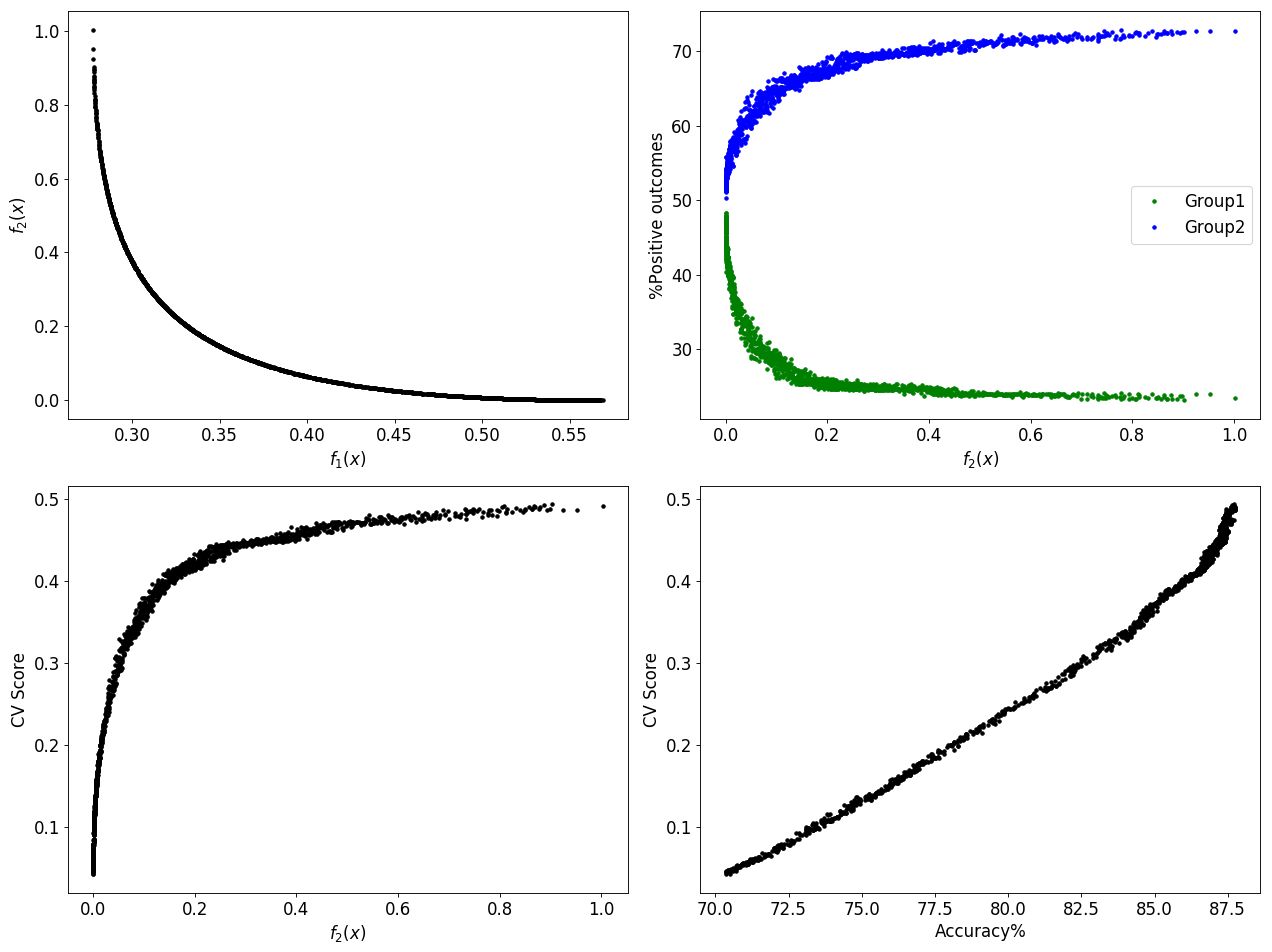

In [6]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.set_xlabel('$f_1(x)$', fontsize = 15)
ax1.set_ylabel('$f_2(x)$', fontsize = 15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.plot(training_obj2, percentage[:, 0]*100.0, 'g.', lw=2, label = 'Group1')
ax2.plot(training_obj2, percentage[:, 1]*100.0, 'b.', lw=2, label = 'Group2')
ax2.set_xlabel('$f_2(x)$', fontsize = 15)
ax2.set_ylabel('%Positive outcomes', fontsize = 15)
ax2.legend(fontsize=15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_Score, 'k.', lw=2)
ax3.set_xlabel('$f_2(x)$', fontsize=15)
ax3.set_ylabel('CV Score', fontsize=15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100.0, CV_Score, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize=15)
ax4.set_ylabel('CV Score', fontsize=15)

plt.tight_layout()
plt.show()
